## <b><div style='padding:15px;background-color:#003f88;color:white;border-radius:2px;font-size:110%;text-align: left'>SUPERVISED MACHINE LEARNING GOALS</div></b>

<b style=' color:red;border-radius:2px;font-size:110%;text-align: left'>note !</b>
> the perequisite for understanding what we are going to do here is watching,Understanding and interacting with the WMDI videos on Supervised ML, where the theoritical aspects and some KEY concepts are discussed and explored.
IF you haven't watched and interacted the videos then what we will be doing here will be ALOT HARDER to understand and EXTREMELY confusing.
> So if you haven't watched the WMDI videos and resources given to prep you for this class, kindly MAKE SURE you do that...

**The major GOAL of every machine learning engineering task is to;**
- To prepare data to build machine learning models
- To build different machine learning models
- To evaluate model accuracy
- To identify the high and low performing models and Optimize the best performing model
- To productionalize or Report Best performing Model

In this Case Study, we are going to zoom in into these goals, now the steps listed  are implemented in an interative manner,
meaning as machine learning engineers, we hardly get the desired output at first trail, instead iterate and go through the phases
listed above till we find a near enough perfect model (thers is nothing like a perfect model) that will suite our
business/organisation use case


## PART A  REGRESSION ANALYSIS
for Regression problems, the goal is to forecast/ predict a continous output, the key differences here are in the type of models we import,
as opposed to a binary or a multi binary output as with the case with classification cases

### ASSIGNMENT TASK 1: carry out a well detailled EDA for the features in the Data set
- Use your data visualization skills to carry out Univariate, Bivariate and Multivariate analaysis and answer the following questions;
- what are the distributions of our target features(Attrition), and  (Monthly income)?
- explore the relationships between the target features with other predictor features
- identify features that are positvely correltaed with our target features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().transpose()
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [6]:
df.describe(include=['object','bool'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


In [7]:
# Investigate Missing data
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
num_cols = list(df.select_dtypes(include='number').columns)
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

In [10]:
len(num_cols), len(cat_cols)

(27, 8)

**Analysis of the dataset shows:**
* The data has 1058 enteries and 35 features. 
* The features have data types of which 27 are numeric while 8 are categorical types.
* There are no missing values in the data.
* Features like `EmployeeCount`, `StandardHours`, `Over18` all have just one value, as such they will be removed from the dataset for not having a range of values.
* For the purpose of this analysis, the `EmployeeNumber` feature will also be dropped because it doesn't add any significant information to the dataset except that it is an employee identifier.
* Features `EnvironmentSatisfaction`, `JobSatisfaction`, `RelationshipSatisfaction`, `WorkLifeBalance` and `JobInvolvement` all have 4 unique values. They might be Likert scales

### What are the distributions of our target features(Attrition), and (Monthly income)?

### Univariate Analysis of target variables

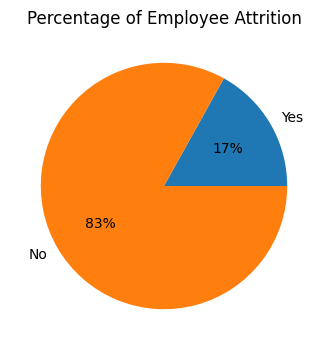

In [11]:
# distributions of our target feature - (Attrition)
fig, ax = plt.subplots(figsize=(5,4))
count = Counter(df['Attrition'])
ax.pie(count.values(), labels=['Yes' if key==1 else 'No' for key in count.keys()], autopct=lambda p:f'{p:.0f}%')
ax.set_title('Percentage of Employee Attrition')
plt.show();

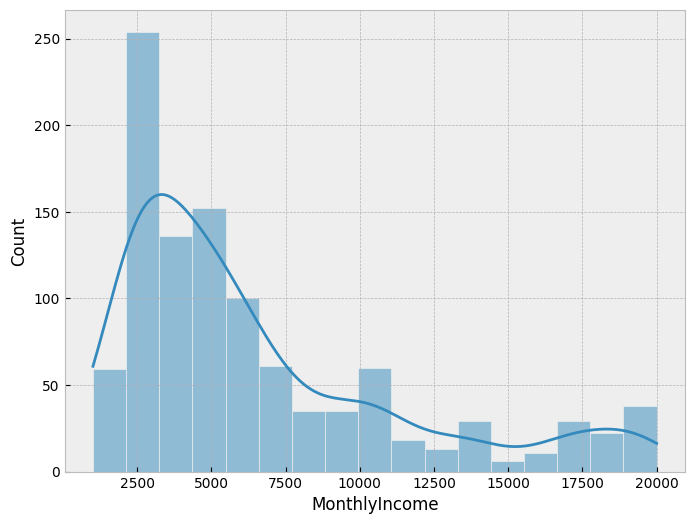

In [12]:
# distribution of our target feature -  (Monthly income)
plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.histplot(df['MonthlyIncome'], kde=True);

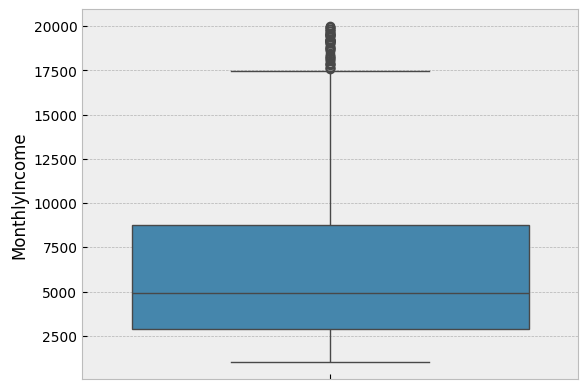

In [13]:
sns.boxplot(y='MonthlyIncome', data=df);

*  Approximately 83% of the employees are retained in the company, while about 17% of the employees left the company.
*  The distribution of the Monthly Income shows a positively skewed distribution. This means there are more employees with lower Monthly Income compared to those with high Monthly Income. The most of the outliers are present in the higher income side of the distribution.

### Explore the relationships between the target features with other predictor features

#### Bivariate Analysis

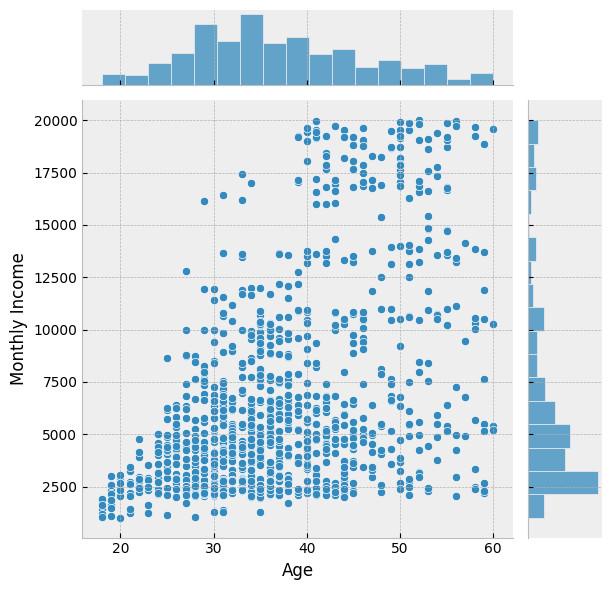

In [14]:
# Investigating the age group and monthly income
sns.jointplot(x='Age', y='MonthlyIncome', data=df)
plt.xlabel('Age')
plt.ylabel('Monthly Income');

**Findings**
* The data points are scattered across the two features
* There seem to be some form of positive correlation bewteen `Age` and `MonthlyIncome`, evident by the movement of the datapoints in an upward direction
* Older employees seem to receive higher monthly income.

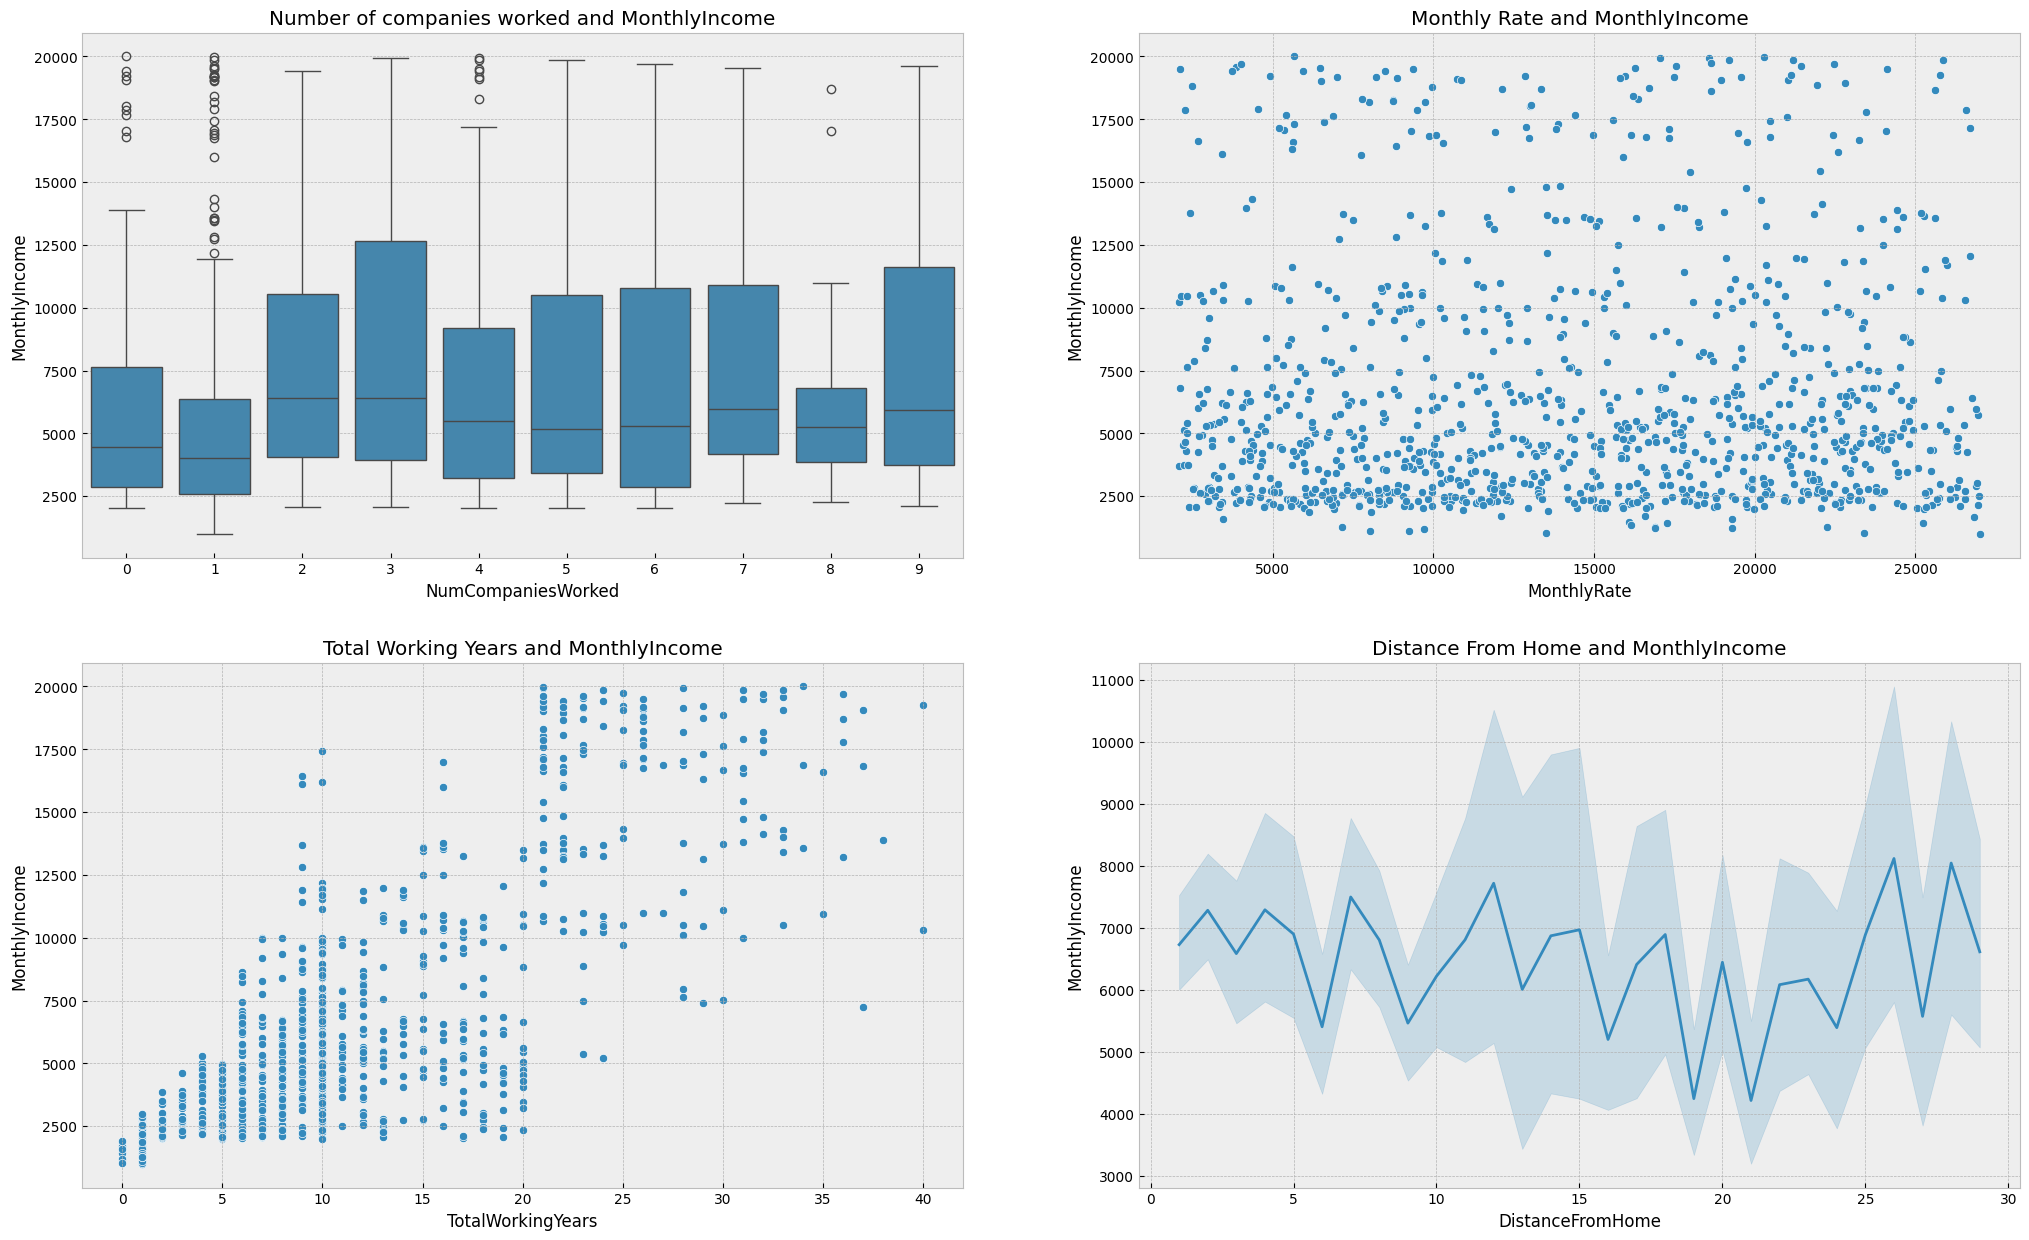

In [15]:
# bivariate numerical analysis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

sns.boxplot(x='NumCompaniesWorked', y='MonthlyIncome', data=df, ax=ax[0,0])
ax[0,0].set_title('Number of companies worked and MonthlyIncome')

sns.scatterplot(x='MonthlyRate', y='MonthlyIncome', data=df, ax=ax[0,1])
ax[0,1].set_title('Monthly Rate and MonthlyIncome')

sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, ax=ax[1,0])
ax[1,0].set_title('Total Working Years and MonthlyIncome')

sns.lineplot(x='DistanceFromHome', y='MonthlyIncome', data=df, ax=ax[1,1])
ax[1,1].set_title('Distance From Home and MonthlyIncome');

**Findings**
* Employees that have worked previously in three companies seem to have the greatest spread across all monthly incomes, and they also have higher monthly income on the average in comparison to others.
* There is a positive correlation between employees total working years and how much they make monthly.

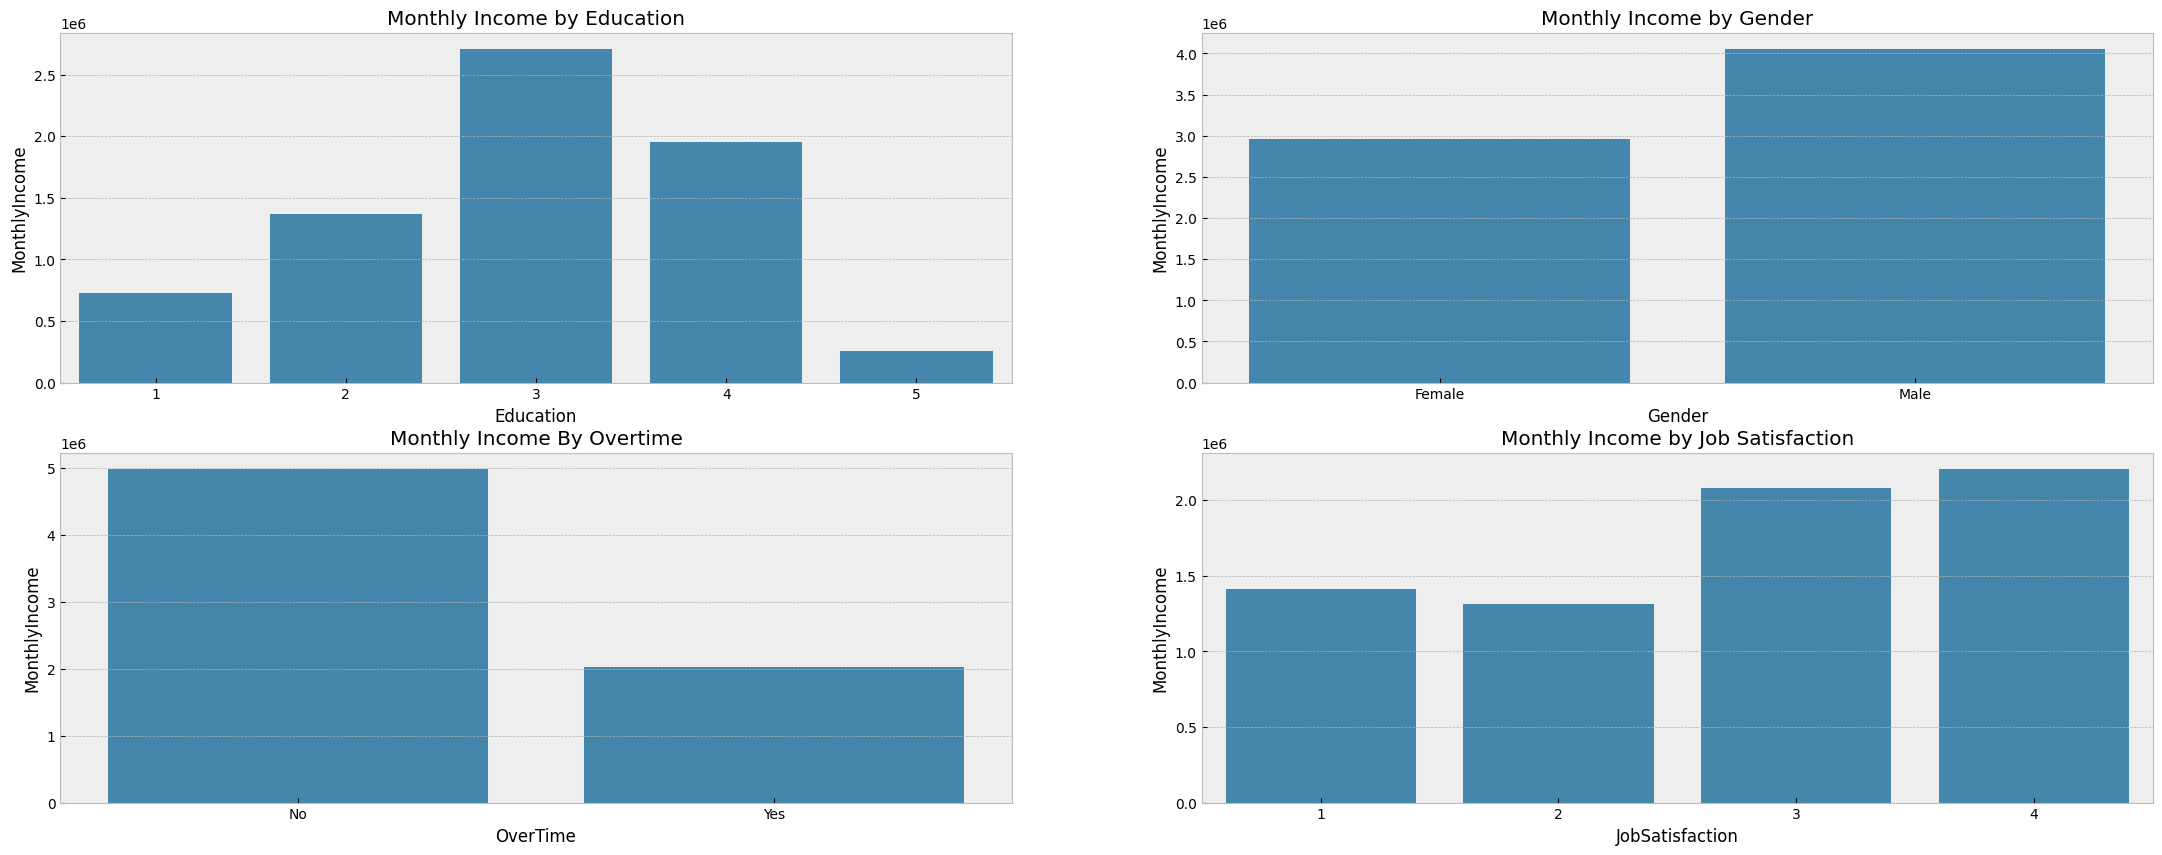

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(27,10))

educ = df.groupby('Education')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='Education', data=educ, y='MonthlyIncome', ax=ax[0,0])
ax[0,0].set_title('Monthly Income by Education')

gender = df.groupby('Gender')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='Gender', data=gender, y='MonthlyIncome', ax=ax[0,1])
ax[0,1].set_title('Monthly Income by Gender')

overtime = df.groupby('OverTime')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='OverTime', data=overtime, y='MonthlyIncome', ax=ax[1,0])
ax[1,0].set_title('Monthly Income By Overtime')

job_sat = df.groupby('JobSatisfaction')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='JobSatisfaction', data=job_sat, y='MonthlyIncome', ax=ax[1,1])
ax[1,1].set_title('Monthly Income by Job Satisfaction');


**Observation**
* The male gender receives higher monthly income compared to the female gender.
* Employees with a Bachelor's degree tend to have a high monthly income, closely followed by those with a Masters degree.
* There are relatively less employees with a Doctoral degree, and those with a Below college education tend to earn less.
* Engaging in an overtime work does not necessarily translate to higher wages, and employees with 'very high' job satisfaction naturally have higher monthly wages. The job satisfaction could be a good predictor feature for Monthly Income.

### Identify features that are positvely correltaed with our target features

#### Multivariate Analysis

In [17]:
hm = df[['Age', 'Attrition', 'DailyRate','DistanceFromHome', 'Education', 
        'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 
        'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 
        'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion','YearsWithCurrManager']].corr()

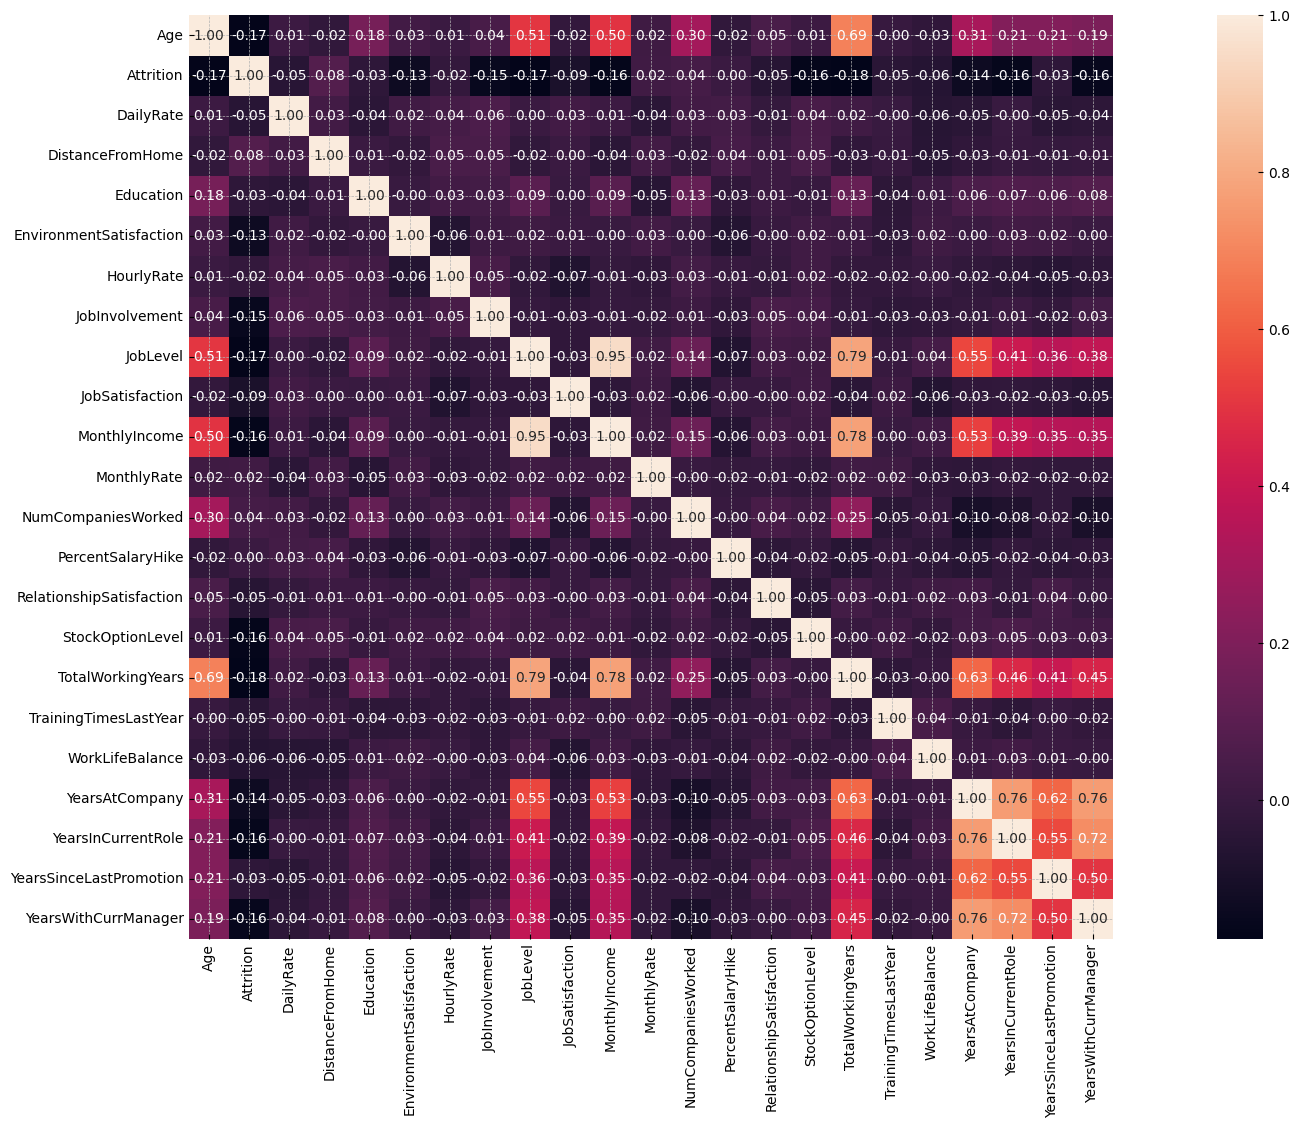

In [18]:
# Correlation between target variable (Attrition) and other variables in the dataset
plt.figure(figsize=(27,12))
sns.heatmap(hm, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

**Observation**  
* `Age`, `JobLevel`, `TotalWorkingYears`,`YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrentManager` are features that are seen to have a positive correlation with the Monthly Income. It does not necessarily mean that these features lead to a higher or lower monthly income.

### Phase 1
- Preparing and Processing Data for Modelling
  > data preprocessing,
  > variable encoding,
  > data scaling and normalization

#### Data Preprocessing
- we have identified data issues like, redundant data that will be dropped
- we will then encode the categorical features in the data
- scale the data set
- plot a feature importances visualiztion, to understand features that may be important predictor features from the dataset

**Going from the information from the describe method, we see that columns `Over18`, `StandardHours`, `EmployeeNumber`, and `EmployeeCount` are redundant and do not add any value to the dataset**
**The `MonthlyIncome`column will also be dropped and the log transformed column will be used as the target variable**

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
#dropping off some redundant features
data = df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber', 'MonthlyIncome','Attrition','MonthlyRate'], axis=1)

In [21]:
#creating a copy of the dataset for part B
df2 = data.copy()

In [22]:
#encode the categorical features to numerical ones
df2 = pd.get_dummies(df2, drop_first=True)

In [23]:
#segmenting target label from the dataset

target = df[['MonthlyIncome']]

In [24]:
print(df2.shape, target.shape)

(1058, 42) (1058, 1)


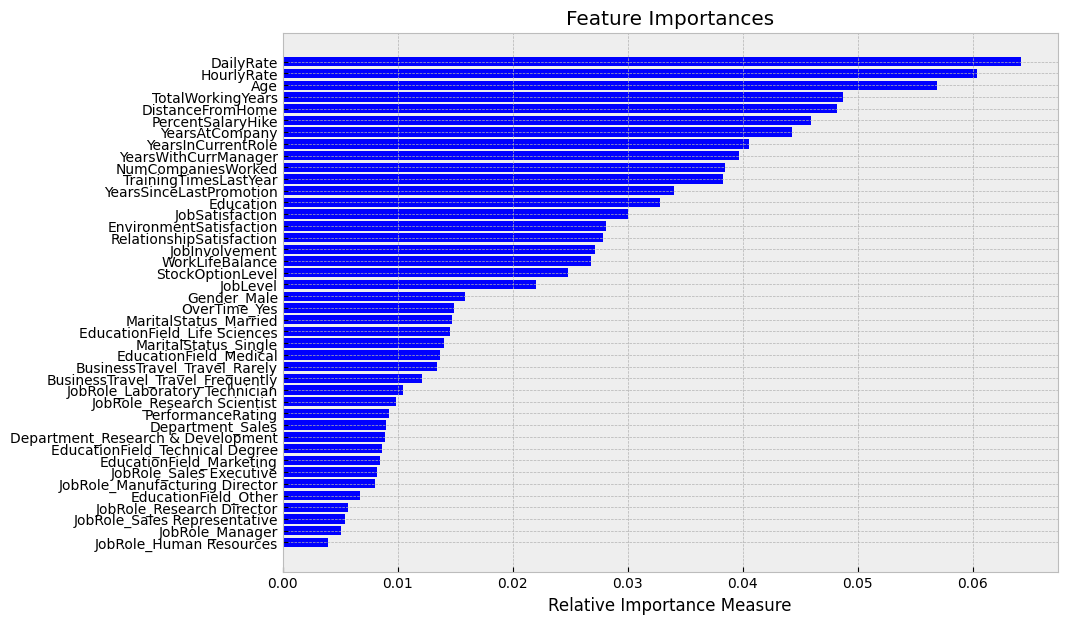

In [25]:
# scale dataset features

# Instantiate the scaler object
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

#identifying key featurs from the data set
#plotting a feature importance chart
model = RandomForestClassifier()
model.fit(df_scaled, target)


#weill use a random classifier model to identify the importance features
importances = model.feature_importances_
sorted_imp = np.argsort(importances)

names = list(df2.columns)

# Plot visualization
plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_imp)), importances[sorted_imp], color='blue', align='center')
plt.yticks(range(len(sorted_imp)), [names[x] for x in sorted_imp])
plt.title('Feature Importances')
plt.xlabel('Relative Importance Measure');
# fit the model




* Going by the plot of feature importances, we see that features such as  `MonthlyRate`, `DailyRate`, `HourlyRate`, `Age`, `TotalWorkingYears`, `DistanceFromHome`, `YearsAtCompany`, `PercentSalaryHike`, `YearsInCurrentRole`, `YearsWithCurrManager`, `NumCompaniesWorked`, `TrainingTimesLastYear`, `YearsSinceLastPromotion`, `Education`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobSatisfaction`, `JobInvolvement`, `WorkLifeBalance`, `StockOptionLevel`, `JobLevel` constitute important predictive fetaures for `MonthlyIncome`.

### Phase 2
- Splitting data into training and evaluation datasets
- Implementing Machine Learning/model Building and Training
- creating a predictions file

#### Baseline Model

In [26]:
# split the DataFrame into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(df_scaled, target, train_size=0.8, random_state=1)

In [27]:
x_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',


In [28]:
# Fit a linear regression model on the training set
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [29]:
#Creating a prediction file 
lin_pred = lreg.predict(x_val)
#lin_pred

### Phase 3
- **we will compute the model's r_squared score (r2_score) which is a measure of how "good afit" the linear model is for modelling this kind of data**
- **here we will use business metrics such as the mean squared error(mse) and the root mean squared error (rsme) model Evaluation
to evaluate the linear regression's model's performance**
- **we'll also visualize the plot of the model's predicted label  vs the actual label**

In [30]:
# import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, lin_pred)
r2 = r2_score(y_val, lin_pred)
rmse = np.sqrt(mse)

print(f"R-Squared score {r2}")
print(f"Mean Squared score {mse}")
print(f"RSME score {rmse}")

R-Squared score 0.953622012706103
Mean Squared score 1092799.0664680237
RSME score 1045.3703011220587


**Observation**
* The result shows a `r2_score` of 0.95. It gives a measure of how good afit a linear model is for modelling this dataset. A value close to 1 indicates a good `r2_score`, thus our model is a good fit to predict monthly income.
* In terms of predicting the monthly income of an employee, the margin of error the model will likely generate between the actual monthly income and the predicted monthly income will be a disparity of about 1044 per prediction.
* The smaller this error margin, the better.

In [31]:
x1 = y_val.values.ravel()
x2 = lin_pred.ravel()

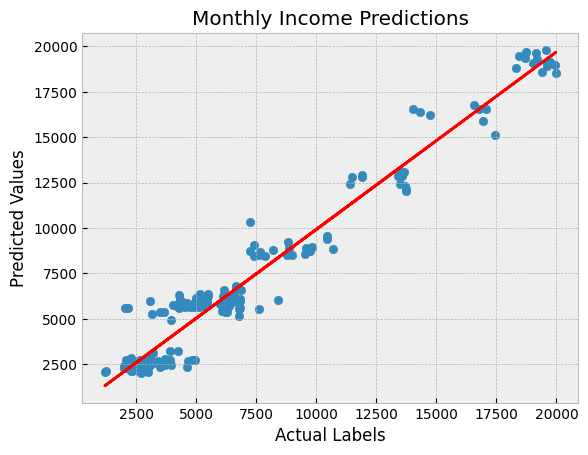

In [32]:
# Plot predicted vs Actual
plt.scatter(y_val, lin_pred)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Values')
plt.title('Monthly Income Predictions');

# overlay the regression line
z = np.polyfit(x1, x2, 1)
p = np.poly1d(z)
plt.plot(x1, p(x1), color='red')
plt.show();

**Observation**
* There seem to be a form of linear relationship between the actual and the predicted values.
* This indicates that our model is doing a good job predicting monthly income
* The regression line of best fit shows an upward trend and it tells that our predicted values are not far off from our actuals.

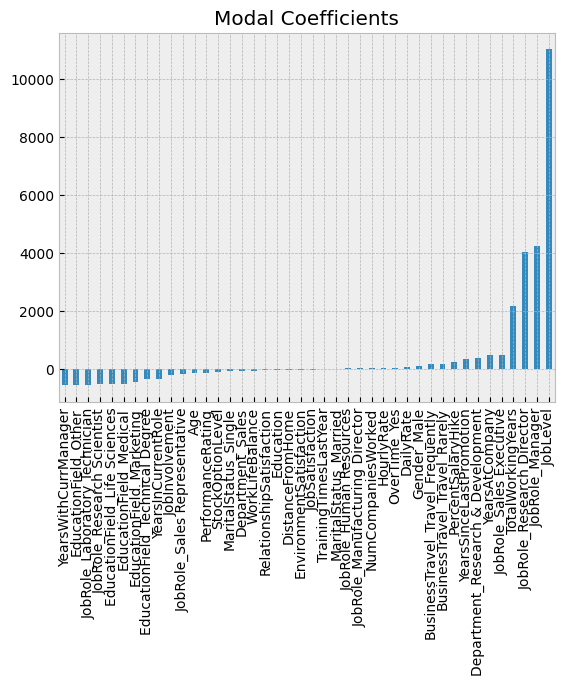

In [33]:
# Visualizing model coefficients
from pandas import Series

predictors = x_train.columns
coef = Series(lreg.coef_.ravel(), predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients');

* **The above shows the strengths (coefficeints) of some of these features in predicting the monthly income, with the `JobLevel` playing a very significant role in the positive spectrum in predicting employee monthly income.**

### Phase 3 Hyper Parameter Optimization
- hyperparameter optimization is the art and science of improving our model's performances
- we will be  implementing and optimizing a GradientBoostingRegressor model

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
    'learning_rate': [0.1,0.5,1],
    'n_estimators': [50,100,150]
}


# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
grid = GridSearchCV(alg, params, scoring=score, cv=3)
grid.fit(x_train, y_train)
print('Best parameter combination:', grid.best_params_, '\n')

# measuring performance on test set
print('Applying best model on test data:')
best_mod = grid.best_estimator_
pred = best_mod.predict(x_val)

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

Applying best model on test data:


In [35]:
# Evaluate the model using the test data

mse1 = mean_squared_error(y_val, pred)
r21 = r2_score(y_val, pred)
rmse1 = np.sqrt(mse1)

print(f"R-Squared score {r21}")
print(f"Mean Squared score {mse1}")
print(f"RSME score {rmse1}")

R-Squared score 0.9633140136271685
Mean Squared score 864427.5873085274
RSME score 929.7459799905173


**Observations**
* After optimizing through tuning of our hyperparameters, the R-Squared score improved to 0.96 while the RSM error margin reduced from 1044 to 919.
* Thus this is our best performing model and we can productionize this model.

### Productionizing Our Model
this is the last stage of the machine learning pipeline, and the main aim here points to how the users use/consume the model.
there are alot of ways an ML Model can be used
- it can be embedded into an application to be used by users online via an API on  web interfaces or on mobile devices
- It can be used to create reports or dashboards that will be used by the organisation in making key business decisions
- it can be consumed via streaming or batch methods

**In this case scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions**

In [36]:
test_data = pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [37]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = './optimized_mod.pkl'
joblib.dump(best_mod, filename)

['./optimized_mod.pkl']

**Now to stimulate a typical production environment, we will use the test data set( the other data set in the data folder) as the new employeedata set to
predict**

In [38]:
#apply transforms to the new data similar to the training dataset
test_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [39]:
test_data = pd.get_dummies(test_data, drop_first=True)

# Inference 
prediction = best_mod.predict(test_data)

In [40]:
test_data['predicted_monthly_income'] = prediction

In [41]:
test_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,predicted_monthly_income
0,34,790,24,4,1,40,2,2,2,0,...,False,False,False,False,True,False,False,True,True,16142.300722
1,35,660,7,1,4,76,3,1,3,1,...,False,False,False,False,False,True,True,False,False,15817.383491
2,24,381,9,3,2,89,3,1,1,2,...,False,False,False,False,False,False,False,True,True,15349.369251
3,24,830,13,2,4,78,3,1,2,1,...,False,False,False,False,False,True,True,False,False,15817.383491
4,44,1193,2,1,2,86,3,3,3,5,...,False,True,False,False,False,False,False,True,True,16442.047404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,884,23,2,3,41,4,2,4,4,...,False,False,False,False,False,False,True,False,False,15103.790919
408,39,613,6,1,4,42,2,3,1,4,...,False,False,False,False,False,False,True,False,False,17021.534131
409,27,155,4,3,2,87,4,2,2,1,...,False,True,False,False,False,False,True,False,True,16442.047404
410,49,1023,2,3,4,63,2,2,2,2,...,False,False,False,False,True,False,True,False,False,16142.300722


**Final Thoughts**
* After applying every transform carried out on the training data onthis test data, which the model has not seen before, we see the predictions made on the dataset. This process of productionizing our best model (make it into a pickle file) was achieved using the `joblib` library